<a href="https://colab.research.google.com/github/UICHANLEE/2023_DataScience/blob/ML/%5B%EB%B6%84%EB%A5%98%5D_%EC%9A%B0%EB%A6%AC%EC%95%A0%EB%8A%94_%EB%A8%B8%EB%A6%AC%EB%8A%94_%EC%A2%8B%EC%9D%80%EB%8D%B0_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
os.environ['KAGGLE_USERNAME'] = 'uichanlee'
os.environ['KAGGLE_KEY'] = '8c543ed4142c36dea50c6e2cd6f4ea8e'

# 문제 2 데이터 다운로드 및 압축해제하기

In [3]:
!kaggle datasets download -d aljarah/xAPI-Edu-Data
!unzip '*.zip'

  0% 0.00/5.54k [00:00<?, ?B/s]
100% 5.54k/5.54k [00:00<00:00, 4.71MB/s]
Archive:  xAPI-Edu-Data.zip
  inflating: xAPI-Edu-Data.csv       


In [58]:
import pandas as pd

df = pd.read_csv('xAPI-Edu-Data.csv')

In [127]:
df['SectionID'].value_counts()

A    283
B    167
C     30
Name: SectionID, dtype: int64

- gender: 학생의 성별 (M: 남성, F: 여성)  

- NationaliTy: 학생의 국적

- PlaceofBirth: 학생이 태어난 국가

- StageID: 학생이 다니는 학교 (초,중,고)

- GradeID: 학생이 속한 성적 등급

- SectionID: 학생이 속한 반 이름

- Topic: 수강한 과목

- Semester: 수강한 학기 (1학기: S/2학기: F)

- Relation: 주 보호자와 학생의 관계

- raisedhands: 학생이 수업 중 손을 든 횟수

- VisITedResources: 강좌 커리큘럼을 확인한 횟수

- Viewing announcements : 학생이 과목 공지를 확인한 횟수

- Discussion: 학생이 토론 그룹에 참여한 횟수

- ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부

- ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부

- StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)

- Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)


In [60]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [130]:
df.drop('PlaceofBirth', axis = 1, inplace = True)
df.drop('StageID', axis = 1, inplace = True)

In [131]:
df['ParentAnsweringSurvey'].replace({'Yes':1, 'No':0}, inplace = True)

In [132]:
df['ParentschoolSatisfaction'].replace({'Good': 1, 'Bad':0}, inplace = True)

In [133]:
df['StudentAbsenceDays'].replace({'Under-7': 1, 'Above-7': 0}, inplace = True)

In [134]:
import seaborn as sns

In [135]:
df

,gender,NationalITy,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,G-04,A,IT,F,Father,15,16,2,20,1,1,1,M
1,M,KW,G-04,A,IT,F,Father,20,20,3,25,1,1,1,M
2,M,KW,G-04,A,IT,F,Father,10,7,0,30,0,0,0,L
3,M,KW,G-04,A,IT,F,Father,30,25,5,35,0,0,0,L
4,M,KW,G-04,A,IT,F,Father,40,50,12,50,0,0,0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,G-08,A,Chemistry,S,Father,5,4,5,8,0,0,0,L
476,F,Jordan,G-08,A,Geology,F,Father,50,77,14,28,0,0,1,M
477,F,Jordan,G-08,A,Geology,S,Father,55,74,25,29,0,0,1,M
478,F,Jordan,G-08,A,History,F,Father,30,17,14,57,0,0,0,L


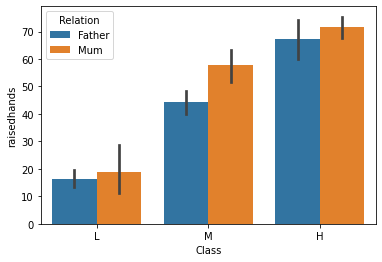

In [137]:
sns.barplot(x = 'Class', y = 'raisedhands', data = df, order = ['L', 'M', 'H']) # 성적과 손을 든 횟수의 관계

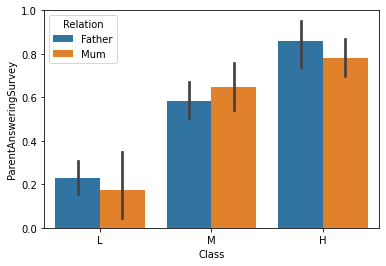

In [138]:
sns.barplot(x = 'Class', y = 'ParentAnsweringSurvey', hue = 'Relation', data = df, order = ['L', 'M', 'H']) # 성적과 부모 학교설문에 참여했는지 관계

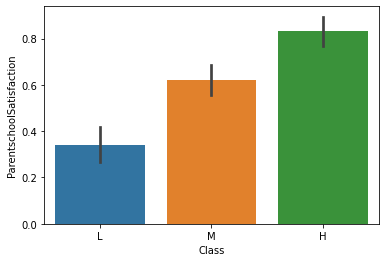

In [114]:
sns.barplot(x = 'Class', y = 'ParentschoolSatisfaction', data = df, order = ['L', 'M', 'H']) # 성적과 부모 만족도의 관계

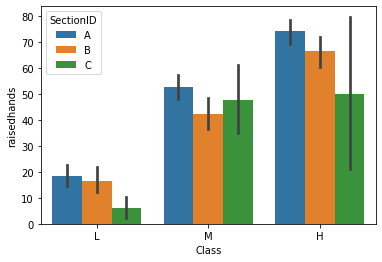

In [129]:
sns.barplot(x = 'Class', y = 'raisedhands', hue = 'SectionID', data = df, order = ['L', 'M', 'H']) # 성적과 출석과 관계 1이면 출석을 잘함

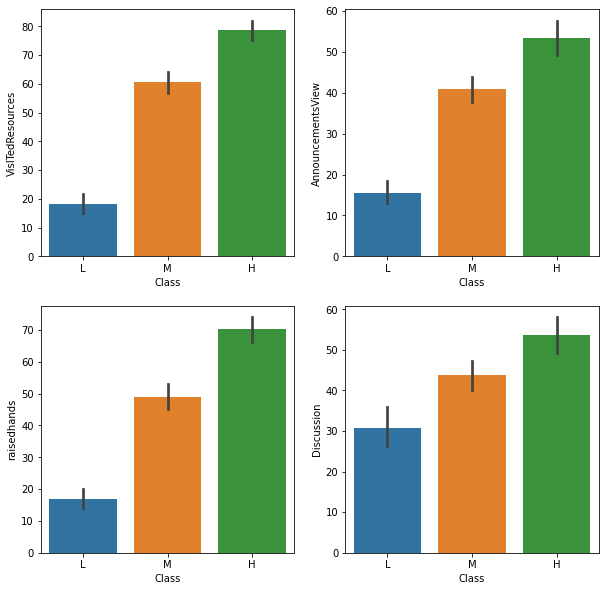

In [141]:
import matplotlib.pyplot as plt

fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=df, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=df, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=df, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=df, order=['L','M','H'], ax=axarr[1,1])